## Data Analytics Lab (2nd Week)

### Probability Distribution, Moments, Visualisation, Data Generation, Parameter Estimation, Hypothesis Testing, Correlation

### Basic moments of one-dimensional data and visualisation

Implement functions to compute median, mode, sample mean, sample variance, standard deviation of one-dimensional data 
"without using numpy". 

Example :
data1 = np.array([1,2,3,4,5])

data1_median = median(data1)

data1_mode = mode(data1)

data1_mean = mean(data1)

data1_variance = variance(data1)

data1_stddev = stddev(data1)

In [29]:
# import dependencies
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import pandas as pd
from collections import Counter
import scipy.stats
import seaborn as sns

Compute the above for different one-dimensional datasets - data1.txt, data2.txt, data3.txt, data4.txt and store as data1_median, data2_median etc. Verify the results using the numpy built in functions for mean,stddev and variance.

In [6]:
# mean
def mean(x):
    return sum(x)/len(x)

# median
def median(x):
    x = sorted(x)
    n = len(x)
    if n%2==0:
        return (x[n//2] + x[n//2 - 1])/2
    else:
        return x[n//2]
    
# mode
def mode(x):
    counts = Counter(x)
    return counts.most_common(1)[0][0]
    
# variance
def variance(x):
    n = len(x)
    x_mean = mean(x)
    return sum([(i - x_mean)**2 for i in x])/(n-1)

#stddev
def stddev(x):
    return math.sqrt(variance(x))

Comparison of my functions' results with numpy results

In [38]:
data = np.random.normal(loc=8, scale=2, size=10000)
data = data.astype(int)

# Mean
print("Mean of the data =", mean(data))
print("Mean using numpy =", np.mean(data))
print()

# Median
print("Median of the data =", median(data))
print("Median using numpy =", np.median(data))
print()

# Mode
print("Mode of the data =", mode(data))
print("Mode using scipy =", scipy.stats.mode(data).mode[0])
print()

#Mean
print("Variance of the data =", variance(data))
print("Variance using numpy =", np.std(data)**2)
print()

#Mean
print("Standard Deviation of the data =", stddev(data))
print("Standard Deviation using numpy =", np.std(data))
print()

Mean of the data = 7.4799
Mean using numpy = 7.4799

Median of the data = 7.0
Median using numpy = 7.0

Mode of the data = 7
Mode using scipy = 7

Variance of the data = 4.016397629763029
Variance using numpy = 4.01599599

Standard Deviation of the data = 2.004095214744806
Standard Deviation using numpy = 2.003995007478811



Visualize all the datasets (1-4) separately using matplotlib scatter plot and histograms. 

1. Comment on initial observations of distributions. 

2. For each dataset, specify which descriptive statistics best describe the data.

Example :

data1 - mean

data2 - mean

data3 - mean

data4 - mean

Hints: If you want to plot a known distribution (Normal,Unifrom, Exponential etc) using matplotlib, define it as a function 
and plot it. For this, you need to know the formula of the chosen distribution. If you dont know the exact distribution 
of a dataset, plot it as a histogram and smooth the data by converting bin edges to centres. Using seaborn library: 
    Install seaborn library and use $\texttt{distplot()}$ function to plot the distribution and verify the result.

In [71]:
data = np.random.normal(loc=8, scale=2, size=1000)

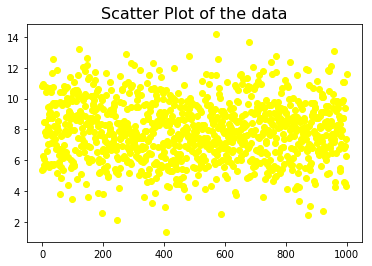

In [72]:
# visualization by scatter plot
plt.scatter(list(range(len(data))), data, color='yellow')
plt.title("Scatter Plot of the data", size=16)
plt.show()

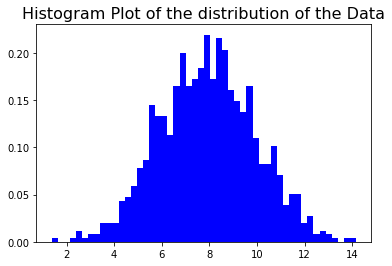

In [73]:
# histogram plot
plt.hist(data, bins = 50, color='blue', density=True)
plt.title("Histogram Plot of the distribution of the Data", size=16)
plt.show()

From the scatter plot and the histogram, it is clear that it is a Gaussian distribution. So the mean and the variance are the most appropriate characteristics.

Above mismatch is due to discretizing the data to include only integers. If that is not done, then:

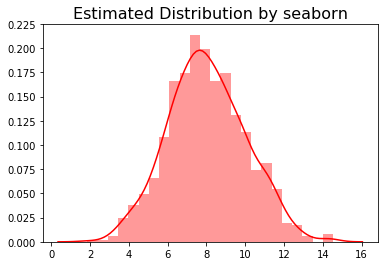

In [74]:
# Using seaborn to view the plot of the distribution
data = np.random.normal(loc=8, scale=2, size=1000)
sns.distplot(data, color='red')
plt.title("Estimated Distribution by seaborn", size=16)
plt.show()

#### Exponential Distribution

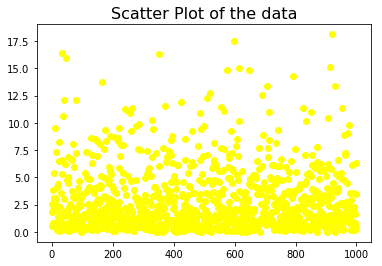

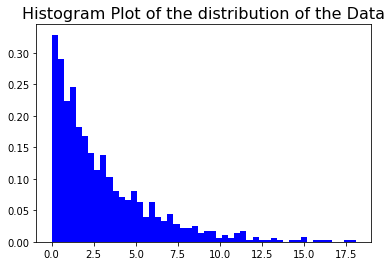

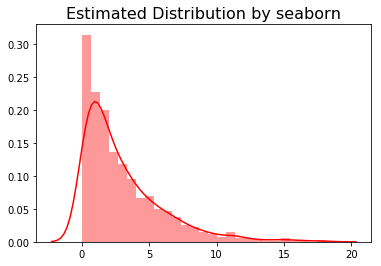

In [76]:
data = np.random.exponential(scale=3, size=1000)

# visualization by scatter plot
plt.scatter(list(range(len(data))), data, color='yellow')
plt.title("Scatter Plot of the data", size=16)
plt.show()

# histogram plot
plt.hist(data, bins = 50, color='blue', density=True)
plt.title("Histogram Plot of the distribution of the Data", size=16)
plt.show()

# Using seaborn to view the plot of the distribution
sns.distplot(data, color='red')
plt.title("Estimated Distribution by seaborn", size=16)
plt.show()

#### Poisson Distribution

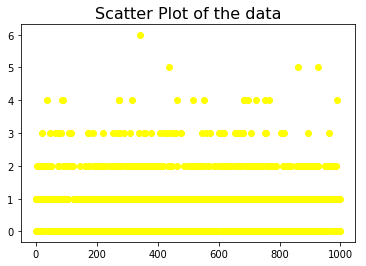

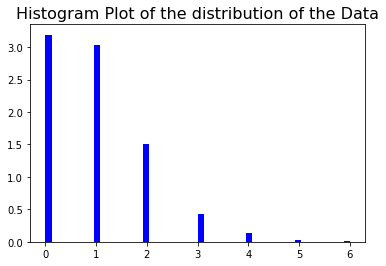

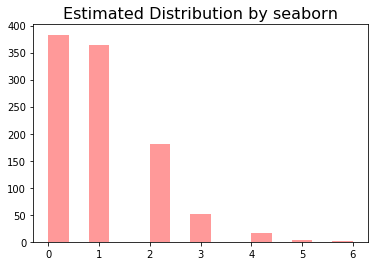

In [79]:
data = np.random.poisson(lam=1, size=1000)

# visualization by scatter plot
plt.scatter(list(range(len(data))), data, color='yellow')
plt.title("Scatter Plot of the data", size=16)
plt.show()

# histogram plot
plt.hist(data, bins = 50, color='blue', density=True)
plt.title("Histogram Plot of the distribution of the Data", size=16)
plt.show()

# Using seaborn to view the plot of the distribution
sns.distplot(data, kde=False, color='red')
plt.title("Estimated Distribution by seaborn", size=16)
plt.show()

#### Uniform Distribution

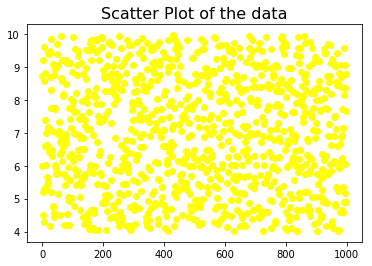

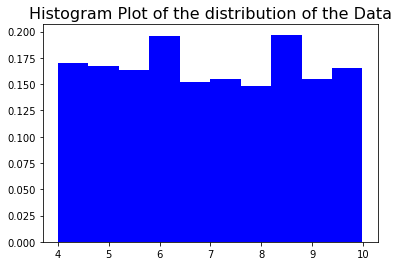

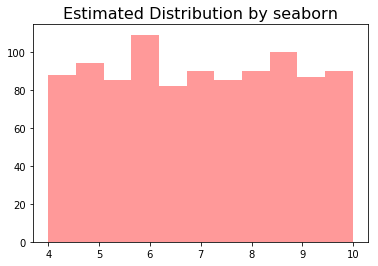

In [81]:
data = np.random.uniform(low=4, high = 10, size=1000)

# visualization by scatter plot
plt.scatter(list(range(len(data))), data, color='yellow')
plt.title("Scatter Plot of the data", size=16)
plt.show()

# histogram plot
plt.hist(data, bins = 10, color='blue', density=True)
plt.title("Histogram Plot of the distribution of the Data", size=16)
plt.show()

# Using seaborn to view the plot of the distribution
sns.distplot(data, kde=False, color='red')
plt.title("Estimated Distribution by seaborn", size=16)
plt.show()

### Probability Distribution parameters and visualisation

Uniform Distribution: A uniform distribution, also called a rectangular distribution, is a probability distribution that has constant probability. This distribution is defined by two parameters, a and b: a is the minimum and b is the maximum.

Formula: 
\begin{align*}
f(x) = \frac{1}{b-a} , a \leq x \leq b
\end{align*}
Parameters:  $\text{Mean} = \frac{(a+b)}{2} ; \text{Variance} = \frac{1}{12(b-a)^2}$


Gaussian Distribution: The normal distribution is a probability function that describes how the values of a variable are distributed. It is a symmetric distribution where most of the observations cluster around the central peak and the probabilities for values further away from the mean taper off equally in both directions. For mean, $\mu$ and standard deviation, $\sigma$, the formula is given as
\begin{align*}
f(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}
\end{align*}

Use the random.normal() method to get a Normal Data Distribution.

It has three parameters:

loc - (Mean) where the peak of the bell exists.

scale - (Standard Deviation) how flat the graph distribution should be.

size - The shape of the returned array.

Given a normal distribution of mean = 3 and standard deviation = 1. 
1. Find $P(x\leq3)$ from the given distribution. 
2. Find the probability that $P(3\lt x\leq5)$ drawn from the given distribution. 
Write a function to estimate the above cumulative distribution function of a normal distribution. Verify the same.
 

In [21]:
# Function for estimating cdf
def estimateCDF(x, a, b):
    """
    PARAMETERS:
    x : input 1D data
    a, b: data points at which cdf is to be estimated 
    
    RETURNS:
    cdf : cumulative distibution values s.t. P(a<x<=b)  
    """
    n = len(x)
    valid_points = [1 if a<=point<=b else 0 for point in x]
    cdf = sum(valid_points)/n
    return cdf

data = np.random.normal(loc=3, scale=1, size=100000)

# 1. Find  P(x<3)  from the given distribution
a = min(data)
b = 3
print("P(X<3) = {}".format(estimateCDF(data, a, b)))

# 2. Find the probability that P(3<x<=5)  drawn from the given distribution
a = 3
b = 5
print("P(3<X<=5) = {}".format(estimateCDF(data, a, b)))

P(X<3) = 0.50084
P(3<X<=5) = 0.47601


### Maximum Likelihood Estimation for normal distribution : 
A method of estimating the parameters of a distribution by maximizing a likelihood function, so that under the assumed statistical model the observed data is most probable. For normal distribution, $f(x,\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$, the goal is to determine $\mu$ and $\sigma$ for our data so that we can match our data to its most likely Gaussian bell curve. The estimated mean, $\hat{\mu}$ for normal distribution is  $\hat{\mu} = \frac{1}{n}\sum_{i=1}^nx_i$ and the estimated standard deviation is $\hat{\sigma} = \sqrt{ \frac{1}{n}\sum_{i=1}^n(x_i-\mu)^2}$.

Assuming that data1 has been sampled from normal distribution with unknown mean and standard deviation of 2, calculate $95\%$ confidence interval of data1_mean.

1. Mean of the sampling distribution of the mean is the same as the population mean.
2. Standard error of the mean (standard deviation of the sampling distribution of the mean) = $\frac{\sigma}{\sqrt{N}}$
3. 95% of the area in a Gaussian distribution lies within (+-1.96 * std deviation) from the mean

So using the sample data1, we first find the mean (say, data1_mean). That mean is also the mean of the **"sampling distribution of the mean"**. So the 95% confidence interval =  [data1_mean - 1.96 \* data1_std, data1_mean + 1.96 \* data1_std]

data1_std = $\frac{2}{\sqrt{sample  size}}$

In [64]:
# Get a sample of the data (size of the sample = N)
N = 1000
data1 = np.random.normal(loc=8, scale=2, size=N)

data1_mean = sum(data1)/N
data1_std = 2/math.sqrt(N)

lower_limit = data1_mean - 1.96*data1_std
upper_limit = data1_mean + 1.96*data1_std

print("95% confidence interval of the population mean = [{}, {}]".format(lower_limit, upper_limit))

95% confidence interval of the population mean = [7.906830992038962, 8.154753560596163]


### Parameter estimation

In this section you will fit data to a standard distribution.

Normal distribution 
"DataSet1.txt" is to be fitted to normal distribution. Complete the function fitNormal() to estimate parameters.

In [44]:
import math
def fitNormal(x):
    """
    PARAMETERS:
    x : input 1D data
    
    RETURNS:
    mu : mean of distribution
    sig : standard deviation of distribution
    """
    n = len(x)
    mu = sum(x)/n
    squared_diff = [(i - mu)**2 for i in x]
    sig = math.sqrt(sum(squared_diff)/n)
    return [mu, sig]

def GaussianPDF(x, mu, sigma):
    return (1/math.sqrt(2*math.pi*sigma*sigma)) * np.exp(-((x - mu)**2)/(2*sigma*sigma))

Read the file "DataSet1.txt" into a variable $\texttt{data1}$. Also plot a histogram of the same. Then pass it to $\texttt{fitNormal()}$ to estimate parameters. Generate your own data using estimated parameters and plot the distribution. Use $\texttt{numpy.linspace()}$ to generate 1000 points in the range of $\texttt{data1}$. The probabilities are estimated from Gaussian distribution formula. Make a lineplot in the same figure.

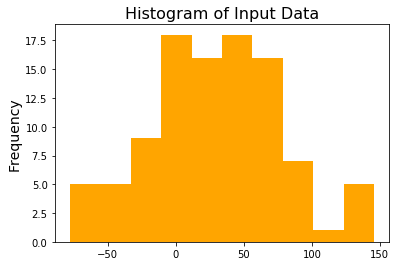

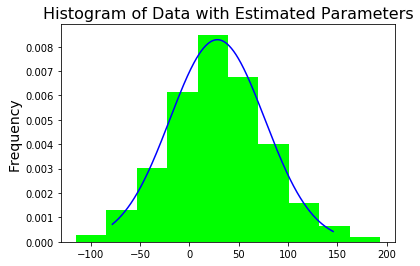

In [55]:
# Read datafile
with open("DataSet1.txt", "r") as f:
    data1 = f.readlines()
data1 = [float(ele[:-1]) for ele in data1]
n = len(data1)

# Plot histogram of input data
plt.hist(data1, bins=int(math.sqrt(n)), color='orange')
plt.ylabel("Frequency", size = 14)
plt.title("Histogram of Input Data", size=16)
plt.show()

# Fit data to normal distribution
est_mu, est_sigma = fitNormal(data1)

# Generate data using estimated parameters for visualization and plot the same
estimated_data = np.random.normal(loc=est_mu, scale=est_sigma, size=1000)

# Use ùöóumpy.linspace() to generate 1000 points in the range of ùöçùöäùöùùöäùü∑
x, bins, p = plt.hist(estimated_data, bins=int(math.sqrt(n)), color='lime', density=True)
plt.ylabel("Frequency", size = 14)
plt.title("Histogram of Data with Estimated Parameters", size=16)
    
x = np.linspace(min(data1), max(data1), 1000)
y = [GaussianPDF(ele, est_mu, est_sigma) for ele in x]
plt.plot(x, y,color='blue')
plt.show()

"DataSet2.txt" is to be fitted to uniform distribution. Complete the function fitUniform() to estimate parameters. Generate and plot data as before.

In [67]:
def fitUniform(x):
    """
    PARAMETERS:
    x : input 1D data
    
    RETURNS:
    a : minimum value of distribution
    b : maximum value of distribution
    """
    a = min(x)
    b = max(x)
    return [a, b]

Read the file "DataSet2.txt" into a variable "data2". Also plot a histogram of the same. Then pass it to $\texttt{fitUniform()}$ to estimate parameters. Generate your own data using estimated parameters and plot the distribution.

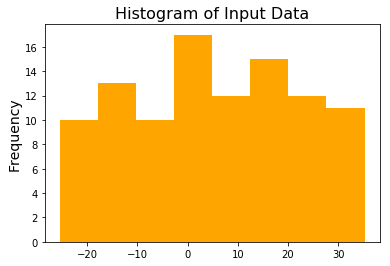

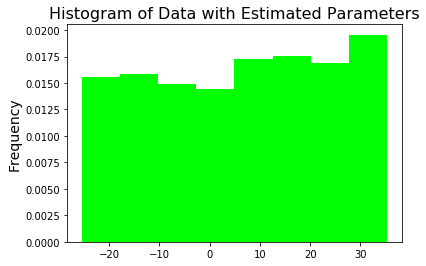

In [71]:
# Read datafile
with open("DataSet2.txt", "r") as f:
    data2 = f.readlines()
data2 = [float(ele[:-1]) for ele in data2]
n = len(data2)

# Plot histogram of input data
plt.hist(data2, bins=8, color='orange')
plt.ylabel("Frequency", size = 14)
plt.title("Histogram of Input Data", size=16)
plt.show()

# Fit data to uniform distribution
est_a, est_b = fitUniform(data2)

# Generate data using estimated parameters for visualization and plot the same
estimated_data = np.random.uniform(low=est_a, high=est_b, size=1000)

# Use ùöóumpy.linspace() to generate 1000 points in the range of ùöçùöäùöùùöäùü∑
x, bins, p = plt.hist(estimated_data, bins=8, color='lime', density=True)
plt.ylabel("Frequency", size = 14)
plt.title("Histogram of Data with Estimated Parameters", size=16)
plt.show()

## Correlation

In this section you are required to measure correlation between two variables. The dataset "**AirQualityData.csv**" contains daily readings of $\text{PM}_{10}$ and $O_3$ concentration in air along with temperature readings. To verify if the variation concentration of any of these pollutants is associated with temperature changes, measure the correlation between temperature and each of these pollutants. Complete the function $\texttt{correlationCoeff()}$ below that measures the correlation coefficient between two given time-series data. For a given n two data sets x and y, the Pearson coefficient formula is given as

\begin{align*}
    r_{xy} = \frac{cov(X,Y)}{\sigma(X)\cdot \sigma(Y)}
\end{align*}
$cov(X,Y) = \frac{\Sigma_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{n-1}; \\ $ 
$\sigma(X), \sigma(Y)$ are respective standard deviations


In [73]:
def correlationCoeff(x, y):
    """
    PARAMETERS:
    x : input 1D data
    y : input 1D data
    
    RETURNS:
    est : coefficient value
    """
    n = len(x)
    x_mean = sum(x)/n
    term1 = [(ele - x_mean) for ele in x]
    
    y_mean = sum(y)/n
    term2 = [(ele - y_mean) for ele in y]
    
    s = 0
    for i in range(n):
        s += term1[i]*term2[i]
    cov = s/n
    
    est = cov/(stddev(x) * stddev(y))
        
    return est

Read the file "AirQualityData.csv" . Ignoring the "date" column, read columns "temp", "pm10" and "o3" as the dataframe as pass them to the function $\texttt{correlationCoeff()}$ to estimate seperately the effect of "pm10" on "temp" and "o3" on "temp". Which of the pollutants has a greater impact on temperature? Compare the value that you get from the above function with the python built in function $\texttt{df.corr()}$ . 

In [77]:
# Read datafile
df = pd.read_csv("AirQualityData.csv")

# Estimate correlation
effect1 = correlationCoeff(df["pm10"], df["temp"])
effect2 = correlationCoeff(df["o3"], df["temp"])

print("Effect (Correlation) of pm10 on temp =", effect1)
print("Effect (Correlation) of o3 on temp =", effect2)
print()

if abs(effect1) > abs(effect2):
    print("pm10 has a greater impact on temperature")
else:
    print("o3 has a greater impact on temperature")
    
# Compare with the inbuilt function
df.corr()

Effect (Correlation) of pm10 on temp = 0.36229472415739306
Effect (Correlation) of o3 on temp = 0.5700885084736845

o3 has a greater impact on temperature


temp      pm10        o3
temp  1.000000  0.362391  0.570239
pm10  0.362391  1.000000  0.333296
o3    0.570239  0.333296  1.000000

### Hypothesis Testing and Confidence Interval 

P Value: A p-value for a statistical model is the probability that when the null hypothesis is true, the statistical summary is equal to or greater than the actual observed results. This is also termed ‚Äòprobability value‚Äô or ‚Äòasymptotic significance‚Äô. The null hypothesis states that two measured phenomena experience no relationship to each other. We denote this as H or H0. If one or more of these probabilities turn out to be less than or equal to Œ±, the level of significance, we reject the null hypothesis.

Example: One such null hypothesis can be that the number of hours spent in the office affects the amount of salary paid. For a significance level of 5%, if the p-value falls lower than 5%, the null hypothesis is invalidated. Then it is discovered that the number of hours you spend in your office will not affect the amount of salary you will take home. 

T Test: Such a test tells us whether a sample of numeric data strays or differs significantly from the population. It also talks about two samples- whether they‚Äôre different. In other words, it gives us the probability of difference between populations.

In [102]:
# Install scipy library 
import scipy.stats
from scipy.stats import norm, kstest, poisson, ttest_ind
# Use the function stats.ttest_ind() 

KS Test: KS Test in Python Statistics: This is the Kolmogorov-Smirnov test. It lets us test the hypothesis that the sample is a part of the standard t-distribution. Let‚Äôs take an example.

In [103]:
#Use the function stats.kstest(x,y) to compare the two distributions x and y 

In [104]:
#Example
#Generate 10,000 random data from a normal distribution of mean 0 and standard 1 with a random seed value of 10.
# Use KS test to compare the generated data to a normal distribution using kstest
#if the p-value is less than 0.05 or 5% (for a 95% confidence level), then the null hypothesis is rejected, 
#which means the generated data is not from the normal distribution

In [105]:
np.random.seed(10)
p_value = kstest(norm.rvs(loc=0, scale=1, size=10000), "norm")
p_value

KstestResult(statistic=0.008418461238842267, pvalue=0.47778938224839096)

p_value = 0.47778938224839096, It is greater than 0.05 (5%) so that data is from the normal distribution

In [106]:
#Example 
# Generate 10,000 random data from a poisson distribution of lambda = 5
# Generate 7,000 random data from a poisson distribution of lambda = 7
# compare the mean of the two data sets using t test with a confidence level of 95%.

In [107]:
data1 = poisson.rvs(mu=5, size=10000)
data2 = poisson.rvs(mu=7, size=7000)
t_test_value = ttest_ind(data1, data2)

In [108]:
t_test_value

Ttest_indResult(statistic=-53.23089104317379, pvalue=0.0)

As p value is zero,it is lower than the threshold of 0.05. So the two lists do not have the same mean.